In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Import Data**

In [3]:
## Read organized_recipes, work on ingredient.

df = pd.read_csv('organized_recipes.csv')

In [4]:
df.shape

(191481, 19)

In [5]:
df.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0


In [6]:
df.set_index('name')

,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
name,,,,,,,,,,,,,,,,,,
arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zydeco shrimp wrap,188810,57,37779,2006-10-03,"['60-minutes-or-less', 'time-to-make', 'course...","[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]",14,"['bring 3 quarts salted to water to a boil', '...",a wrap inspired by great cajun flavors,"['white rice', 'vegetable oil', 'onion', 'gree...",11,482.6,13.0,25.0,37.0,33.0,9.0,27.0
zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0


**check Missing Values and drop them if not many**

In [5]:
df['ingredients'] = df['ingredients'].map(lambda s: s.strip('[').strip(']').replace("'", "").split(', '))
ingredient_list=[]
for row in df['ingredients']:
    ingredient_list.extend(row)

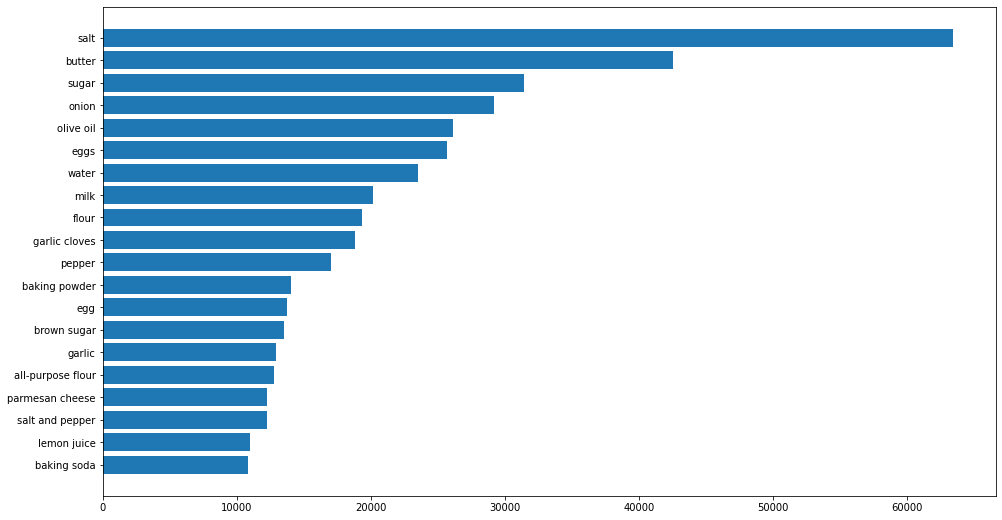

In [6]:
# Top 20 ingredients in the recipe data set.
plt.figure(figsize=(16,9))
plt.barh(pd.Series(ingredient_list).value_counts()[:20].index, pd.Series(ingredient_list).value_counts()[:20].values)
plt.gca().invert_yaxis();

In [7]:
# create a function to create a column for number of matches.
# return 5 most matched recipes.

def matches_df(column, df, user_input):    
    
    matches = []
    
    # split the entered keywords by comma
    import re
    keywords = re.split('; |, |,|\*|\n',user_input.lower())
#     keywords = user_input.lower().split(',')
    
    # create an empty list to store keywords
    keyword_list = []
    
    for i in range(len(keywords)):
        
        # remove white space
        keywords[i] = keywords[i].strip()
#         print(f'User Input: {keywords[i]}\n')
        # append it to keyword_list
        keyword_list.append(keywords[i])
    
    # separate each row
    for text in column:
        
        # initiate 0 as match
        match = 0
        
        # iterate through words in keyword_list
        for keyword in keyword_list:
            
            # if keyword found in text, assign 1 as match
            # stop comparing once assigned as 1, then append it to the list
            if keyword in text:
                match += 1
                #print(text)
#                 break
        matches.append(match)
        
    df['match'] = matches  
    return  df.sort_values(by=['match'], ascending=False).head(5)

In [21]:
print('Please type in keywords separated by commas:\n')
user_input = input()

chosen_recipe = matches_df(df['ingredients'], df, user_input)

Please type in keywords separated by commas:

eggs, beef, cheese, onion, spinach


In [23]:
chosen_recipe[['name', 'minutes', 'ingredients', 'steps', 'description', 'match']]


,steps,name,minutes,ingredients,steps,description,match
166760,"['fry potatoes in olive oil', 'do not brown', ...",tortilla de espinaca,30,"[olive oil, red potatoes, onion, garlic cloves...","['fry potatoes in olive oil', 'do not brown', ...",spain; world tour 8; spinach potato frittata; ...,4
141967,['grease an ovenproof dish placing in layers s...,self crusting quiche,35,"[potatoes, spinach, cheese, onion, garlic, bac...",['grease an ovenproof dish placing in layers s...,this recipe tastes lovely and is very fast and...,4
105037,"['preheat oven to 350', 'spray muffin tins wit...",mini muffin quiche,45,"[eggs, butter, cheese, onion, spinach, broccol...","['preheat oven to 350', 'spray muffin tins wit...","quick, easy, delicious crustless quiches in a ...",4
89660,"['mix potatoes , onion , cheeses , and spinach...",kartoflen auf lauf,45,"[potatoes, onion, velveeta cheese, cheese, fro...","['mix potatoes , onion , cheeses , and spinach...",my daughter in law gave me this recipe and it ...,3
104313,"['in a large pan , saute the chopped onion in ...",middle eastern lamb and spinach soup,95,"[onion, olive oil, turmeric, yellow split peas...","['in a large pan , saute the chopped onion in ...",versions of this are cooked in many parts of t...,3
